In [1]:
# necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text
from pyfonts import load_google_font
import matplotlib.patches as patches
from pywaffle import Waffle

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [5]:
file = r"../data/food_area_decade.csv"
data = pd.read_csv(file)

In [6]:
df = data.copy()

## Data Preparation

In [8]:
# maximim area under cultivation & the decade
max_decade = (df[df["Total"] == df["Total"].max()]["Decade"]).values[0]
max_decade_area = (df[df["Total"] == df["Total"].max()]["Total"]).values[0]

In [ ]:
# transform data for easier plotting
df_melt = df.melt(
    id_vars=["Decade"], 
    value_vars=["Rice", "Wheat", "Coarse Cereals", "Pulses"],
    var_name="grain", 
    value_name="area"
)

## Data Vizualization

### Formatting

In [25]:
# labels for each foodgrain
grain_labels = df_melt["grain"].unique().tolist()

In [ ]:
# fonts
mw_reg = load_google_font("Merriweather Sans")
mw_i = load_google_font("Merriweather Sans", italic=True)
mw_b = load_google_font("Merriweather Sans", weight=500)
mw_bi = load_google_font("Merriweather Sans", weight=500, italic=True)

In [26]:
# colors
colors = [
    "#B87C4C", # Rice
    "#EBCB90", # Wheat
    "#5D688A", # Coarse Cereals
    "#FAA533", # Pulses
]

bg = "#FFFDF6"
colors.append(bg)

In [27]:
# explainers
title_main = "<Coarse Cereals> Pushed Aside:\n<Rice> & <Wheat> Took Over India's Cultivated Area Since <1970>s"
title_sub = "Now rebranded as <Nutri-cereals>, they are at the center of India's revival efforts."
data_source = "Data: Area Under Cultivation (Lakh Hectares) - Reserve Bank of India"

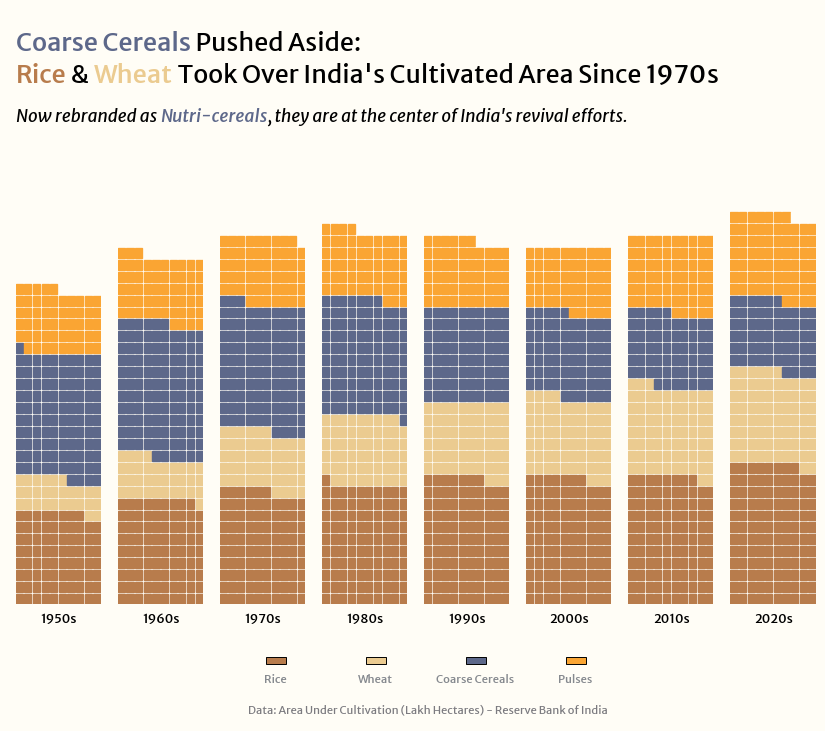

In [28]:
# plotting
ncols = df_melt["Decade"].nunique()

fig, axs = plt.subplots(ncols=ncols, figsize=(10, 7), layout="tight")

fig.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1)
fig.set_facecolor(bg)


for year, ax in zip(df_melt["Decade"].unique(), axs):
    values = list(df_melt[df_melt["Decade"] == year]["area"].values)
    values.append(max_decade - sum(values))
    
    Waffle.make_waffle(
    ax=ax,
    rows=50,
    columns=10,
    values=values,
    vertical=True,
    colors=colors,
  )
  
    ax.text(x=0.1, y=-0.03, s=str(year)+"s", fontsize=9, ha="center", fontweight="bold", font=mw_b)

# legend
legend_xy = [(0.35, 0.02), (0.45, 0.02), (0.55, 0.02), (0.65, 0.02)]
legend_colors = ["#B87C4C", "#EBCB90", "#5D688A", "#FAA533"]
legend_text = ["Rice", "Wheat", "Coarse Cereals", "Pulses"]
box_w, box_h = 0.02, 0.01
for xy, c, text in zip(legend_xy, legend_colors, legend_text):
    legend = patches.Rectangle(
        (xy[0], xy[1]- box_h/2), width=box_w, height=box_h,
        transform=fig.transFigure,
        edgecolor="black", facecolor=c,
        linewidth=0.7, alpha=1,
        clip_on=False, zorder=10
    )
    ax.add_patch(legend)
    fig_text(
        x=xy[0]+box_w/2, y=(xy[1])-0.018, s=text,
        size=8, color="#686D76", font=mw_b,
        ha="center", alpha=0.8
    )



# title
fig_text(
  x=0.1,
  y=0.92,
  s=title_main,
  size=18,
  font=mw_reg,
  highlight_textprops=[
      dict(font=mw_b, color=colors[2]),
      dict(font=mw_b, color=colors[0]),
      dict(font=mw_b, color=colors[1]),
      dict(font=mw_b)
  ],
)

# Sub-title
fig_text(
  x=0.1,
  y=0.81,
  s=title_sub,
  size=12.5,
  font=mw_i,
  highlight_textprops=[
      dict(font=mw_bi, color=colors[2])
  ],
)

# data source
fig_text(
  x=0.332,
  y=-0.042,
  s=data_source,
  size=8,
  font=mw_reg,
  color="#44444E",
  alpha=0.7,
  ha="left"
)

# plt.show()

# save data story
plt.savefig(r"../viz/food_area_decade.jpeg", dpi=250, pad_inches=1, bbox_inches="tight")

---